### Importing Required Libraries

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Dataset from Github Repo
Source: https://www.kaggle.com/competitions/heart-disease-uci/data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/chirayuparikh/CU-DTSA-5510/main/heart.csv")

### Basic dataframe analysis

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### No NaN values, so we don't need to replace any NaN values

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### From the above output we find 165 patients with heart disease and 138 without heart disease

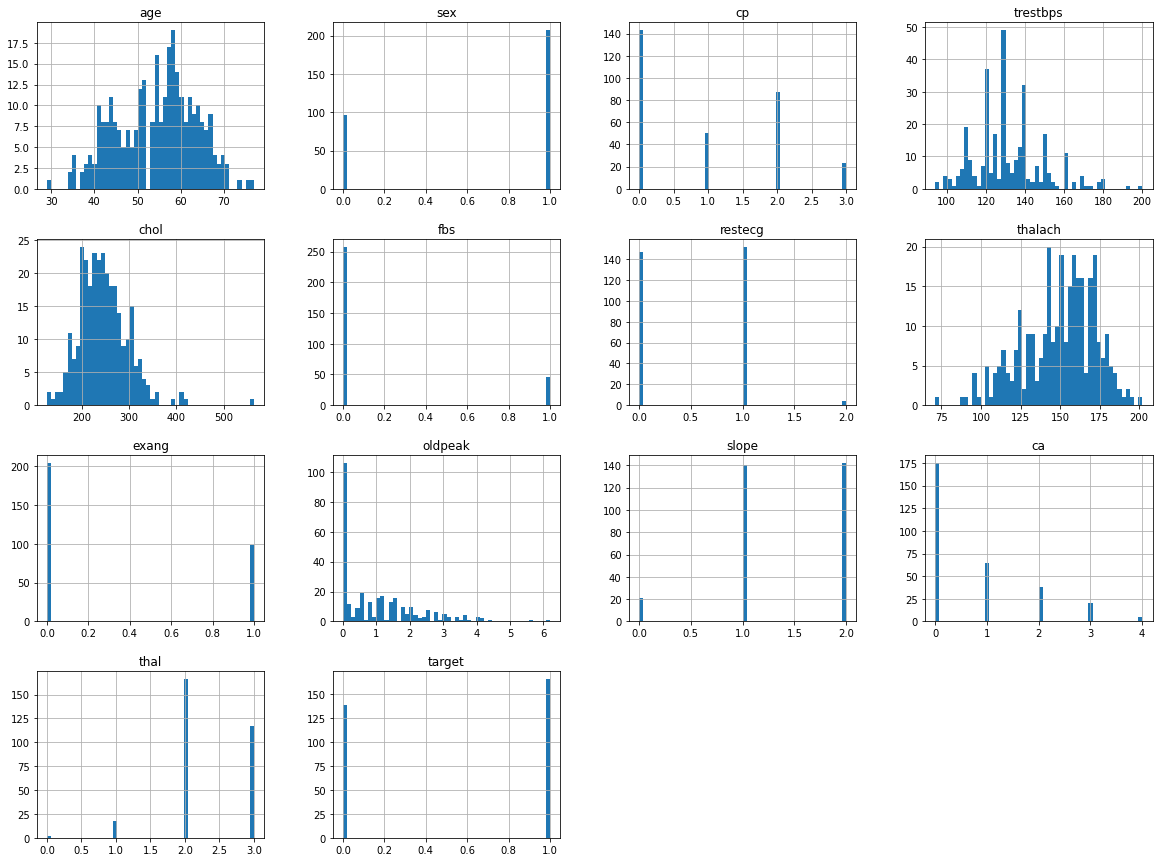

In [8]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

### Finding for possible correlation patterns in the datasets

In [9]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Plot frequency of patience with heart disease

Text(0, 0.5, 'Frequency')

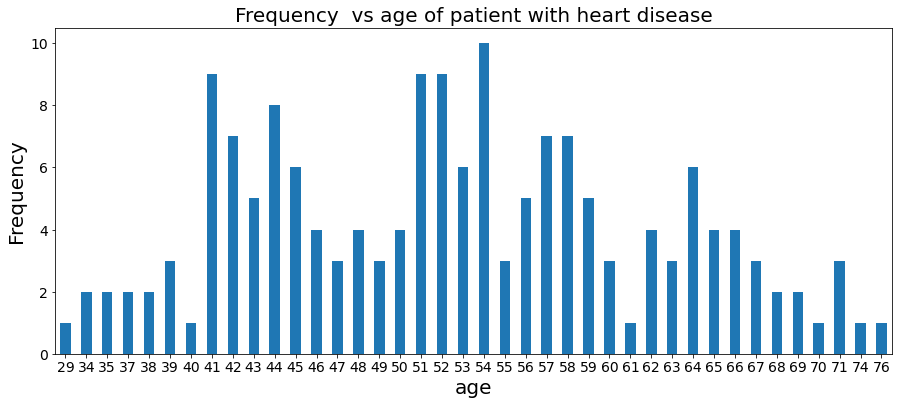

In [11]:
ax = df[df['target'] == 1]['age'].value_counts().sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    title="Frequency  vs age of patient with heart disease",
    rot=0)
ax.set_title("Frequency  vs age of patient with heart disease", fontsize=20)
ax.set_xlabel("age", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

### Plot the precentage of male to female with heart disease. The below graphs show that more males have heart disease then females

Text(0, 0.5, 'frequency')

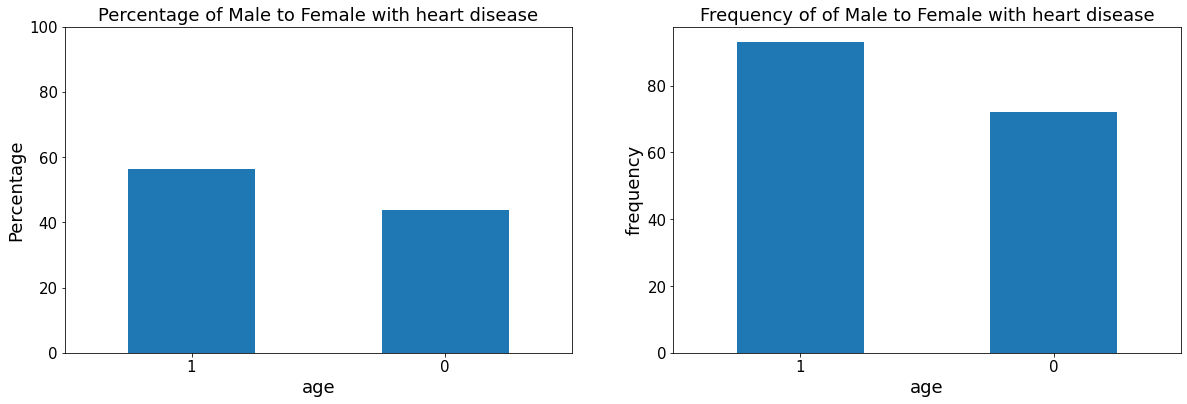

In [12]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 6))

((df[df['target'] == 1]['sex'].value_counts() / len(df[df['target'] == 1])) * 100).plot.bar(
    rot = 0,
    fontsize= 15,
    title='Percentage of Male to Female',
    ax=axarr[0])
axarr[0].set_title('Percentage of Male to Female with heart disease', fontsize=18)
axarr[0].set_xlabel("age", fontsize=18)
axarr[0].set_ylabel("Percentage", fontsize=18)
axarr[0].set_ylim([0,100])

df[df['target'] == 1]['sex'].value_counts().plot.bar(
    rot=0, 
    fontsize= 15,
    title='Frequency of Male to Female with heart disease',
    ax=axarr[1])
axarr[1].set_title('Frequency of of Male to Female with heart disease', fontsize=18)
axarr[1].set_xlabel("age", fontsize=18)
axarr[1].set_ylabel("frequency", fontsize=18)

##### Note: 1 = Male and 0 = Female

### Divide the data to target and features

In [13]:
X = df.drop(['target'], axis=1)
y = df.target

### Encode the catergorical data in the features data

In [14]:
X_encoded = pd.get_dummies(df, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Splitting the data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Cretae KNN model and train the model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 5, metric='minkowski',p=2)
kNN.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred_kNN = kNN.predict(X_test)
y_pred_KNN_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_kNN })
y_pred_KNN_df.head(10)

,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


### Making the Confusion Matrix

In [19]:
KNN_cm = confusion_matrix(y_test, y_pred_kNN)
KNN_cm

array([[26,  4],
       [ 3, 28]])

### Calculate the accuracy of KNN model

In [20]:
KNN_acc = accuracy_score(y_test, y_pred_kNN) 
KNN_acc

0.8852459016393442